In [1]:
import pandas as pd
import sqlite3

def extract_code(input_string):
    return input_string[:3]

def extract_date(input_string):
    return input_string.split('/')[-1]

In [2]:
# 连接到 SQLite 数据库
conn = sqlite3.connect('data/daily.db')

# 获取数据库中的所有表格名称
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# 将每个表格生成 DataFrame
dfs = {}
for table in tables:
    table_name = table[0]
    if table_name in ['Cover_sheet', 'notes', 'pivot']:
        continue
    query = f'SELECT * FROM "{table_name}";'
    df = pd.read_sql_query(query, conn)
    dfs[table_name] = df

# 关闭数据库连接
conn.close()
# guide https://www.gov.uk/government/statistics/fire-statistics-incident-level-datasets/daily-incident-dataset-guidance
daily = dfs


In [3]:
print(type(daily))
print(type(daily['202122']))
for sheet_name, sheet_data in daily.items():
    print(f"Sheet Name: {sheet_name}")
    # print(sheet_data.head())  # 可以根据需要对每个 sheet 进行处理
    # print("--------------------------------------")

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>
Sheet Name: 202122
Sheet Name: 202021
Sheet Name: 201920
Sheet Name: 201819
Sheet Name: 201718
Sheet Name: 201617
Sheet Name: 201516
Sheet Name: 201415
Sheet Name: 201314
Sheet Name: 201213
Sheet Name: 201112
Sheet Name: 201011


In [4]:
print(daily['202122'].columns)
# FRS_TERRITORY->地区
daily['202122'].head()

Index(['FRS_TERRITORY', 'E_CODE_TERRITORY', 'FINANCIAL_YEAR', 'CALENDAR_YEAR',
       'MONTH', 'MONTH_CODE', 'DAY', 'DATE', 'DAY_OF_WEEK',
       'FRIS_INCIDENT_TYPE'],
      dtype='object')


,FRS_TERRITORY,E_CODE_TERRITORY,FINANCIAL_YEAR,CALENDAR_YEAR,MONTH,MONTH_CODE,DAY,DATE,DAY_OF_WEEK,FRIS_INCIDENT_TYPE
0,Avon,E31000001,2021/22,2021,October,10,1,2021-10-01 00:00:00,Fri,Due to apparatus
1,Avon,E31000001,2021/22,2021,October,10,1,2021-10-01 00:00:00,Fri,Due to apparatus
2,Avon,E31000001,2021/22,2021,October,10,1,2021-10-01 00:00:00,Fri,Due to apparatus
3,Avon,E31000001,2021/22,2021,October,10,1,2021-10-01 00:00:00,Fri,Due to apparatus
4,Avon,E31000001,2021/22,2021,October,10,1,2021-10-01 00:00:00,Fri,Due to apparatus


In [5]:
df = daily['201819']

condition = ~df['FRIS_INCIDENT_TYPE'].isin(['Non-fire incidents', 'Malicious', 'Non-fire false alarms', 'Good intent', 'Due to apparatus'])

# 筛选出不满足条件的行
df_without_false = df[condition]

# 打印筛选结果

filtered_df = df_without_false[df_without_false['FRIS_INCIDENT_TYPE'] == 'Dwellings']

# print(filtered_df.head())
print(len(filtered_df))
print(len(df_without_false))
print(len(df))

29597
182935
576539


In [6]:
df['Region_code'] = df['E_CODE_TERRITORY'].apply(extract_code)
print(df['Region_code'].unique())
print(df['E_CODE_TERRITORY'].unique())

print(df['FRS_TERRITORY'].unique())
print(df['FRIS_INCIDENT_TYPE'].unique())
region_df = {'FRS_TERRITORY':list(df['FRS_TERRITORY'].unique())}
region_df = pd.DataFrame(region_df)
region_df.to_csv('data/region.csv',index=False)

['E31']
['E31000001' 'E31000002' 'E31000003' 'E31000004' 'E31000005' 'E31000006'
 'E31000007' 'E31000008' 'E31000009' 'E31000010' 'E31000011' 'E31000047'
 'E31000013' 'E31000014' 'E31000015' 'E31000016' 'E31000046' 'E31000040'
 'E31000048' 'E31000018' 'E31000019' 'E31000020' 'E31000022' 'E31000023'
 'E31000024' 'E31000025' 'E31000041' 'E31000026' 'E31000027' 'E31000028'
 'E31000029' 'E31000030' 'E31000031' 'E31000032' 'E31000042' 'E31000033'
 'E31000034' 'E31000035' 'E31000043' 'E31000036' 'E31000044' 'E31000037'
 'E31000045' 'E31000039']
['Avon' 'Bedfordshire' 'Berkshire' 'Buckinghamshire' 'Cambridgeshire'
 'Cheshire' 'Cleveland' 'Cornwall' 'Cumbria' 'Derbyshire'
 'Devon and Somerset' 'Dorset and Wiltshire' 'Durham' 'East Sussex'
 'Essex' 'Gloucestershire' 'Greater London' 'Greater Manchester'
 'Hampshire and Isle of Wight' 'Hereford and Worcester' 'Hertfordshire'
 'Humberside' 'Kent' 'Lancashire' 'Leicestershire' 'Lincolnshire'
 'Merseyside' 'Norfolk' 'North Yorkshire' 'Northamptonsh

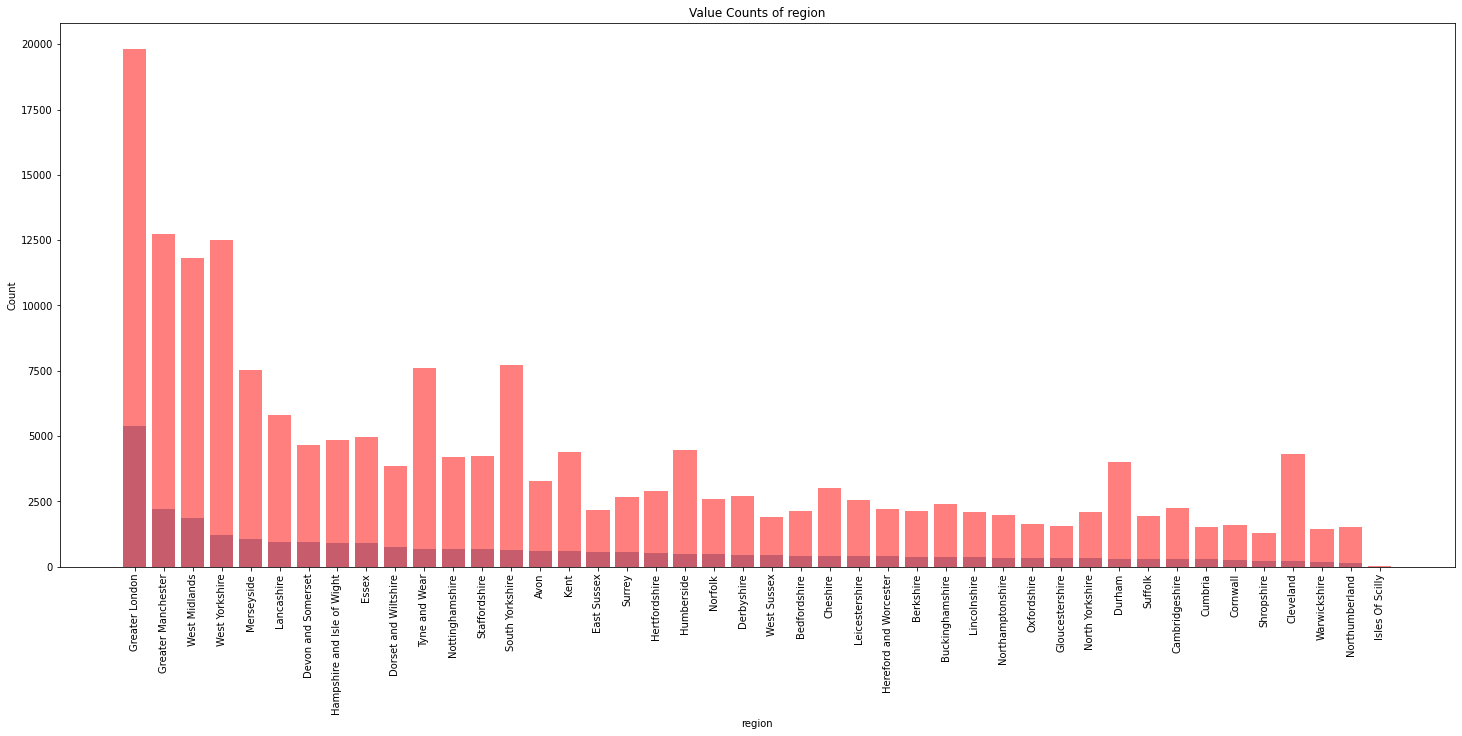

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))

# 统计不同值的出现次数
value_counts = filtered_df['FRS_TERRITORY'].value_counts()
# 绘制直方图
plt.bar(value_counts.index, value_counts.values, alpha=0.5)

value_counts = df_without_false['FRS_TERRITORY'].value_counts()
# 绘制直方图
plt.bar(value_counts.index, value_counts.values, alpha=0.5, color='r')


plt.xlabel('region')
plt.ylabel('Count')
plt.title('Value Counts of region')
plt.xticks(rotation=90)

# 显示图形
plt.show()


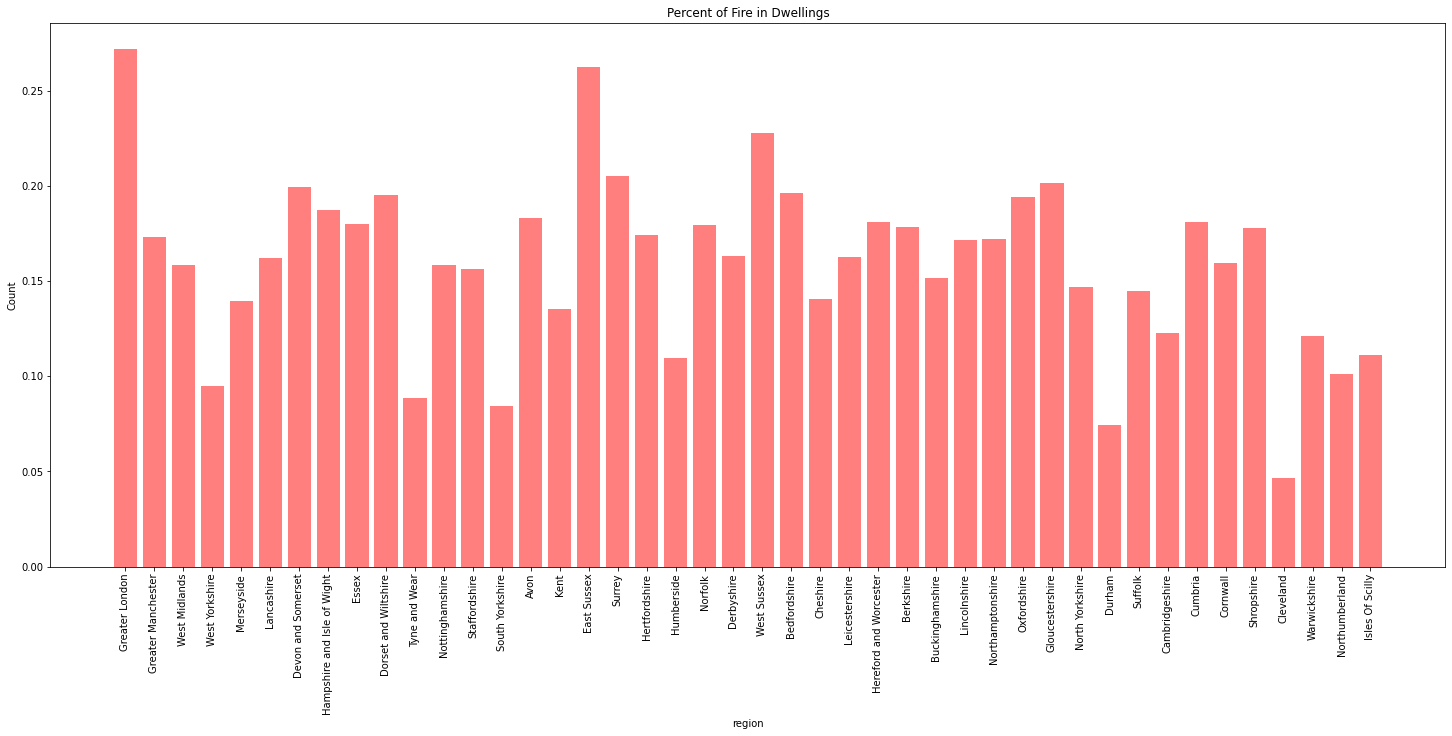

In [8]:
fig = plt.figure(figsize=(25, 10))

# 统计不同值的出现次数
value_counts_dew = filtered_df['FRS_TERRITORY'].value_counts()

value_counts_fired = df_without_false['FRS_TERRITORY'].value_counts()

precent = {}
for index, value in value_counts_dew.items():
    precent[index] = value / value_counts_fired[index]

# 绘制直方图
plt.bar(precent.keys(), precent.values(), alpha=0.5, color='r')


plt.xlabel('region')
plt.ylabel('Count')
plt.title('Percent of Fire in Dwellings')
plt.xticks(rotation=90)

# 显示图形
fig.savefig('percent.jpg')
plt.show()

# House data

现在打算用房价去预测

In [9]:


# guide: https://www.gov.uk/government/publications/about-the-uk-house-price-index/about-the-uk-house-price-index#data-tables
house = pd.read_csv('data/UK-HPI-full-file-2023-02.csv')
# print(house.columns)
# print(house['AreaCode'].unique())
# for r in region_df['FRS_TERRITORY']:
#     if r in house['AreaCode'].unique():
#         print(r in house['AreaCode'].unique())
# # (house[house['AreaCode']=='E09000002']).head()
house['Region_code'] = house['AreaCode'].apply(extract_code)
# print((house['Region_code'].unique()))
# temp=[]
# for x in list((house['Region_code'].unique())):
#     if x[0]=='E':
#         temp.append(x)
# temp.sort()
# print(temp)
# (house[house['Region_code']=='E12']).head()
region_df = house[house['Region_code']=='E12']
region_df.to_csv('data/region.csv',index=False)
for r in list(house['Region_code'].unique()):
    date = ((house[house['Region_code']==r])['Date'])
    year = date.str.split('/').str[-1]
    print(r)
    print(year.unique())
    print("==============")

S12
['2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013'
 '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']
E07
['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']
N09
['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']
E09
['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']
E08
['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']
E06
['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '200

In [35]:
region = {
    'South West': ['Cornwall', 'Devon & Somerset', 'Avon', 'Gloucestershire', 'Dorset & Wiltshire', 'Isles of Scilly'],
    'South East': ['Oxfordshire', 'Buckinghamshire & Milton Keynes', 'Hampshire and Isle of Wight', 'West Sussex', 'East Sussex', 'Kent', 'Surrey', 'Royal Berkshire'],
    'London': ['London Fire and Emergency Planning Authority'],
    'East of England': ['Hertfordshire', 'Bedfordshire', 'Cambridgeshire', 'Norfolk', 'Suffolk', 'Essex'],
    'East Midlands': ['Derbyshire', 'Leicestershire', 'Northamptonshire', 'Lincolnshire', 'Nottinghamshire and City of Nottingham'],
    'Yorkshire and The Humber': ['North Yorkshire', 'West Yorkshire', 'South Yorkshire', 'Humberside'],
    'North West': ['Cumbria', 'Lancashire', 'Cheshire', 'Merseyside', 'Greater Manchester'],
    'West Midlands': ['Shropshire', 'Hereford & Worcester', 'Warwickshire', 'West Midlands', 'Stoke-on-Trent and Staffordshire'],
    'North East': ['Cleveland', 'County Durham and Darlington', 'Northumberland', 'Tyne and Wear']
}

fire2code = {'Avon': 'E31000001', 'Bedfordshire': 'E31000002', 'Buckinghamshire & Milton Keynes': 'E31000004', 'Cambridgeshire': 'E31000005', 'Cheshire': 'E31000006', 'Cleveland': 'E31000007', 'Cornwall': 'E31000008', 'County Durham and Darlington': 'E31000013', 'Cumbria': 'E31000009', 'Derbyshire': 'E31000010', 'Devon & Somerset': 'E31000011', 'Dorset & Wiltshire': 'E31000047', 'East Sussex': 'E31000014', 'Essex': 'E31000015', 'Gloucestershire': 'E31000016', 'Greater Manchester': 'E31000040', 'Hampshire and Isle of Wight': 'E31000048', 'Hereford & Worcester': 'E31000018', 'Hertfordshire': 'E31000019', 'Humberside': 'E31000020', 'Isles of Scilly': 'E31000039', 'Kent': 'E31000022', 'Lancashire': 'E31000023',
    'Leicestershire': 'E31000024', 'Lincolnshire': 'E31000025', 'London Fire and Emergency Planning Authority': 'E31000046', 'Merseyside': 'E31000041', 'Norfolk': 'E31000026', 'North Yorkshire': 'E31000027', 'Northamptonshire': 'E31000028', 'Northumberland': 'E31000029', 'Nottinghamshire and City of Nottingham': 'E31000030', 'Oxfordshire': 'E31000031', 'Royal Berkshire': 'E31000003', 'Shropshire': 'E31000032', 'South Yorkshire': 'E31000042', 'Stoke-on-Trent and Staffordshire': 'E31000033', 'Suffolk': 'E31000034', 'Surrey': 'E31000035', 'Tyne and Wear': 'E31000043', 'Warwickshire': 'E31000036', 'West Midlands': 'E31000044', 'West Sussex': 'E31000037', 'West Yorkshire': 'E31000045'}

region2code = {'East Midlands': 'E12000004', 'East of England': 'E12000006', 'London': 'E12000007', 'North East': 'E12000001', 'North West': 'E12000002', 'South East': 'E12000008', 'South West': 'E12000009', 'West Midlands': 'E12000005', 'Yorkshire and The Humber': 'E12000003'}

code = {}

for key, value in region.items():
    code[region2code[key]] = [fire2code[x] for x in value]

print(code)

all_region = []

for key, value in code.items():
    all_region.extend(value)
print(all_region)
for sheet_name, sheet_data in daily.items():
    print(f"Sheet Name: {sheet_name}")
    


{'E12000009': ['E31000008', 'E31000011', 'E31000001', 'E31000016', 'E31000047', 'E31000039'], 'E12000008': ['E31000031', 'E31000004', 'E31000048', 'E31000037', 'E31000014', 'E31000022', 'E31000035', 'E31000003'], 'E12000007': ['E31000046'], 'E12000006': ['E31000019', 'E31000002', 'E31000005', 'E31000026', 'E31000034', 'E31000015'], 'E12000004': ['E31000010', 'E31000024', 'E31000028', 'E31000025', 'E31000030'], 'E12000003': ['E31000027', 'E31000045', 'E31000042', 'E31000020'], 'E12000002': ['E31000009', 'E31000023', 'E31000006', 'E31000041', 'E31000040'], 'E12000005': ['E31000032', 'E31000018', 'E31000036', 'E31000044', 'E31000033'], 'E12000001': ['E31000007', 'E31000013', 'E31000029', 'E31000043']}
['E31000008', 'E31000011', 'E31000001', 'E31000016', 'E31000047', 'E31000039', 'E31000031', 'E31000004', 'E31000048', 'E31000037', 'E31000014', 'E31000022', 'E31000035', 'E31000003', 'E31000046', 'E31000019', 'E31000002', 'E31000005', 'E31000026', 'E31000034', 'E31000015', 'E31000010', 'E310